In [1]:
!pip install pandas matplotlib seaborn nltk wordcloud


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud


In [3]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from google.colab import files
uploaded = files.upload()


Saving twitter_training.csv to twitter_training (1).csv


In [7]:
import pandas as pd

df = pd.read_csv("twitter_training.csv")
df.head()



,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
df.columns
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
import pandas as pd

df = pd.read_csv("twitter_training.csv", header=None)

df.columns = ["ID","Topic","Sentiment","Text"]

df.head()


,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
df['Sentiment'].value_counts()


,count
Sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


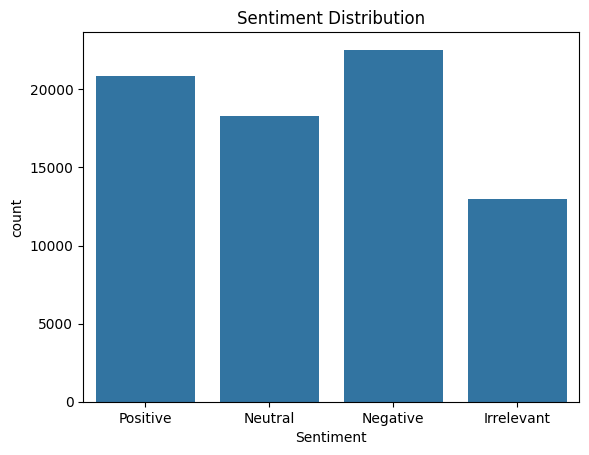

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [14]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+","",text)
    text = re.sub(r"[^A-Za-z]"," ",text)
    words = text.lower().split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['Clean_Text'] = df['Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


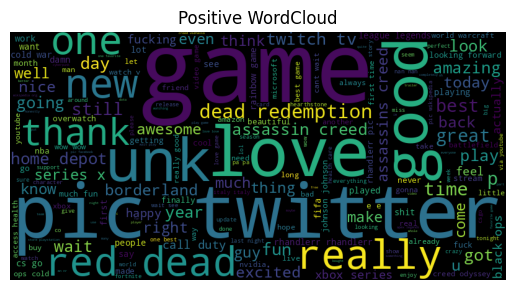

In [15]:
from wordcloud import WordCloud

pos_text = " ".join(df[df['Sentiment']=="Positive"]['Clean_Text'])

wc = WordCloud(width=800,height=400).generate(pos_text)

plt.imshow(wc)
plt.axis("off")
plt.title("Positive WordCloud")
plt.show()


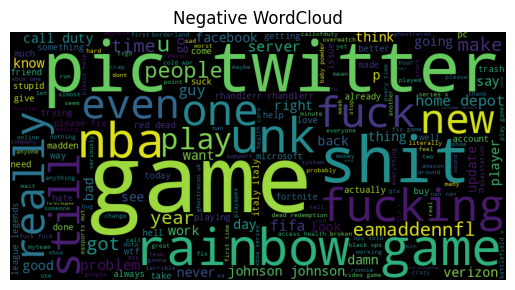

In [16]:
neg_text = " ".join(df[df['Sentiment']=="Negative"]['Clean_Text'])

wc = WordCloud(width=800,height=400).generate(neg_text)

plt.imshow(wc)
plt.axis("off")
plt.title("Negative WordCloud")
plt.show()


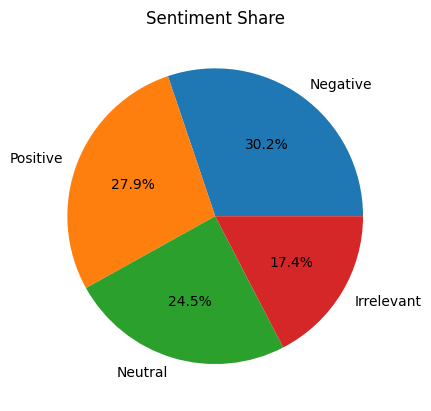

In [17]:
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.title("Sentiment Share")
plt.show()


In [18]:
topic_sentiment = df.groupby(['Topic','Sentiment']).size().unstack()

topic_sentiment


Sentiment,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1020
CS-GO,636,348,552,768
CallOfDuty,672,894,378,450
CallOfDutyBlackopsColdWar,576,576,360,864
Cyberpunk2077,480,390,468,966


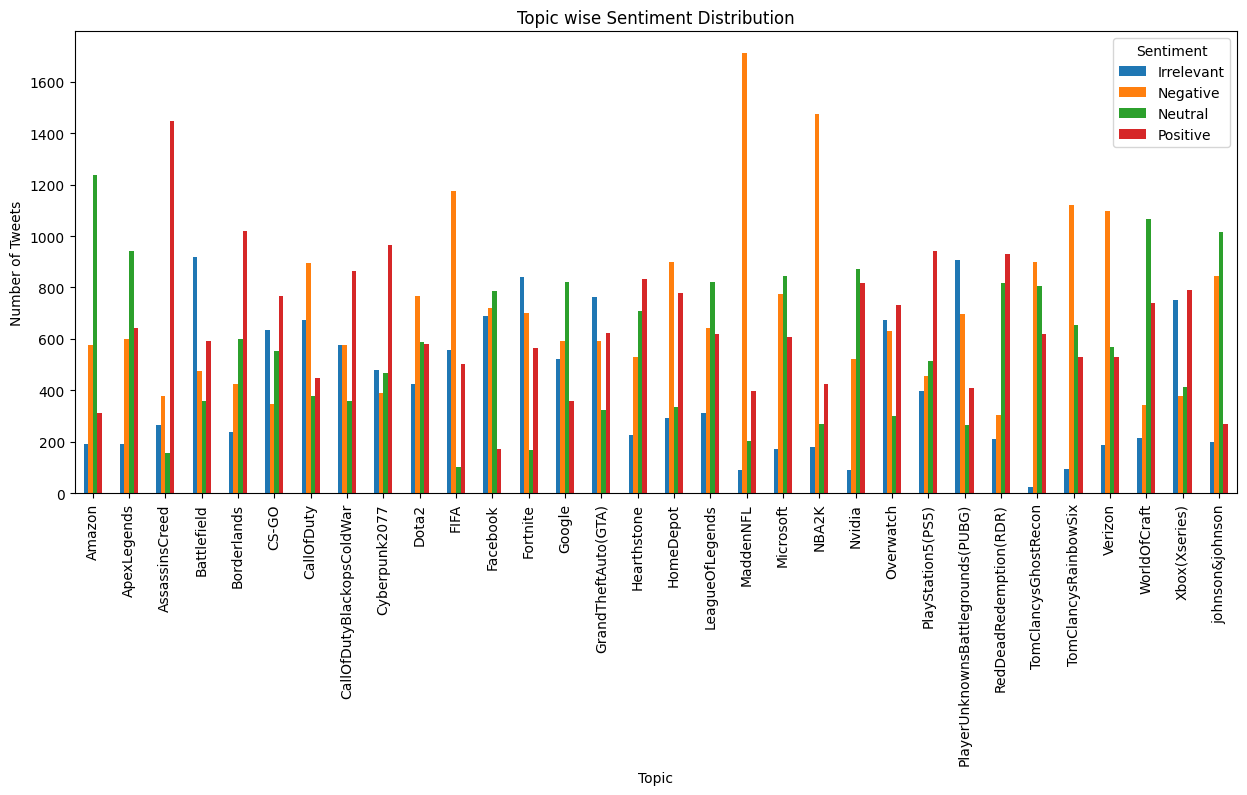

In [19]:
topic_sentiment.plot(kind='bar', figsize=(15,6))

plt.title("Topic wise Sentiment Distribution")
plt.xlabel("Topic")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=90)
plt.show()


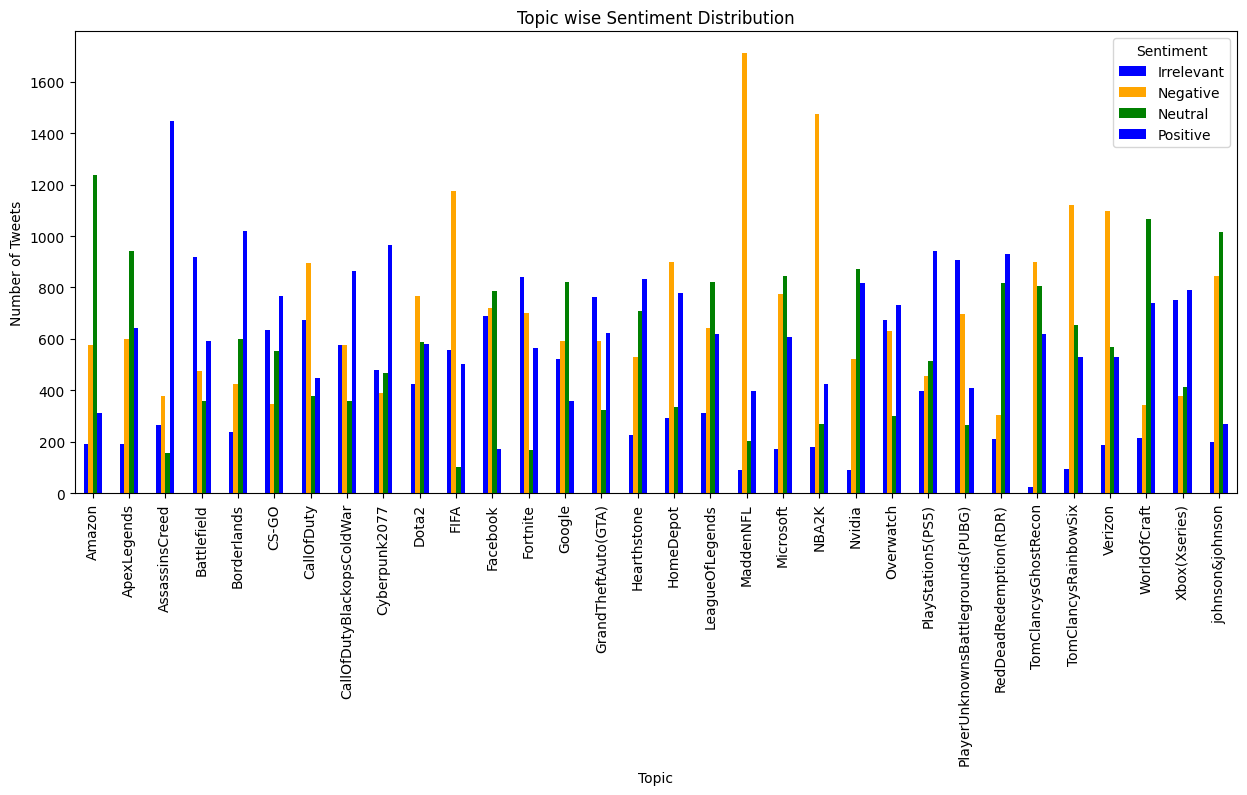

In [20]:
topic_sentiment.plot(
    kind='bar',
    figsize=(15,6),
    color=['blue','orange','green']
)

plt.title("Topic wise Sentiment Distribution")
plt.xlabel("Topic")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.xticks(rotation=90)
plt.show()
